In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

**Relating variables with scatter plots**

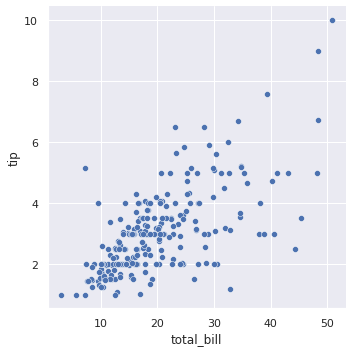

In [ ]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

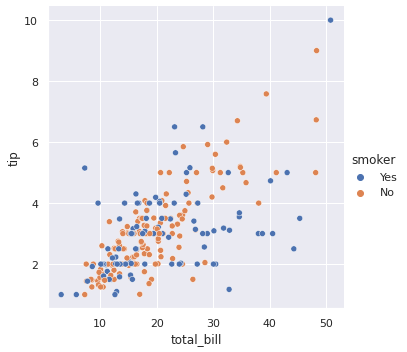

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

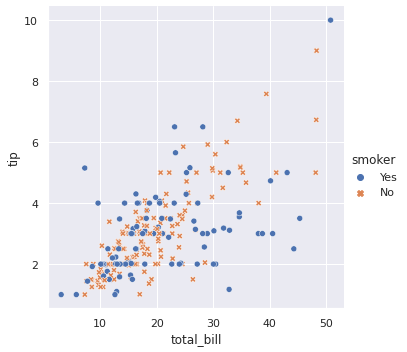

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

It’s also possible to represent four variables by changing the hue and style of each point independently. But this should be done carefully, because the eye is much less sensitive to shape than to color:

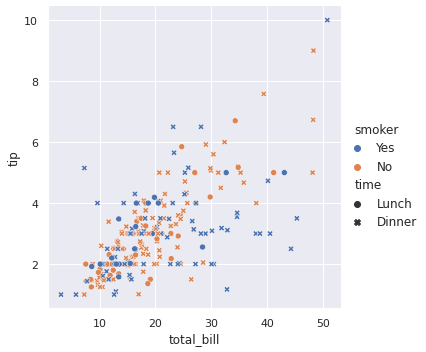

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

In the examples above, the hue semantic was categorical, so the default qualitative palette was applied. If the hue semantic is numeric (specifically, if it can be cast to float), the default coloring switches to a sequential palette:

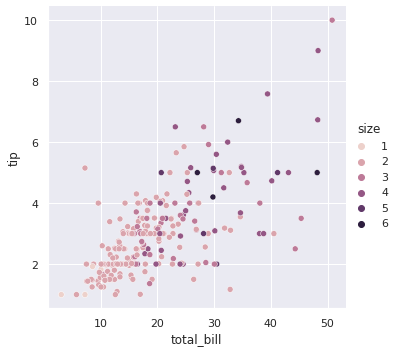

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);


In both cases, you can customize the color palette. There are many options for doing so. Here, we customize a sequential palette using the string interface to cubehelix_palette():

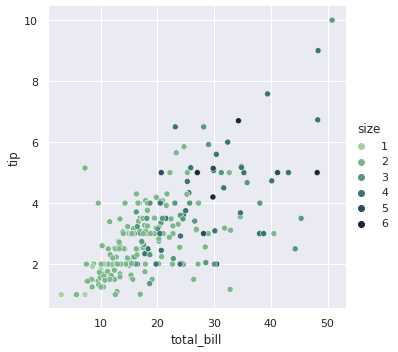

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips);

The third kind of semantic variable changes the size of each point:



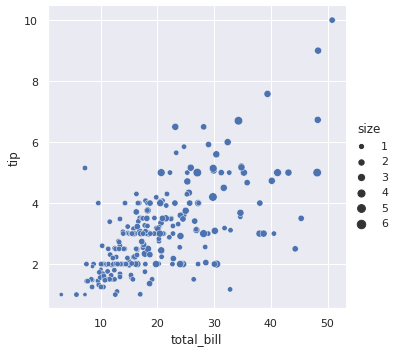

In [ ]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);


Unlike with matplotlib.pyplot.scatter(), the literal value of the variable is not used to pick the area of the point. Instead, the range of values in data units is normalized into a range in area units. This range can be customized:

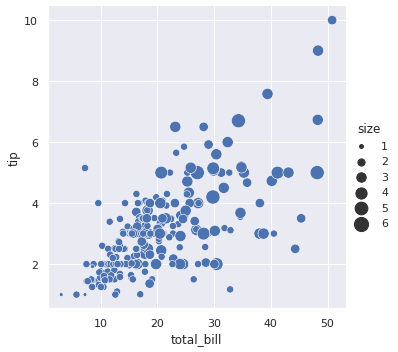

In [ ]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

**Emphasizing continuity with line plots**

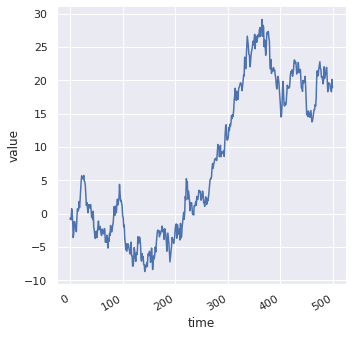

In [ ]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.figure.autofmt_xdate()

Because lineplot() assumes that you are most often trying to draw y as a function of x, the default behavior is to sort the data by the x values before plotting. However, this can be disabled:

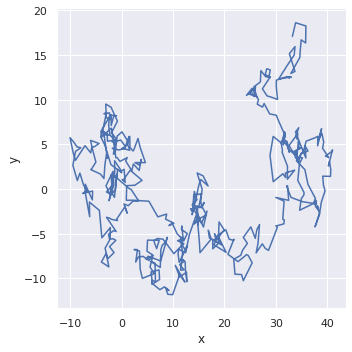

In [ ]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

**Aggregation and representing uncertainty**

More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:

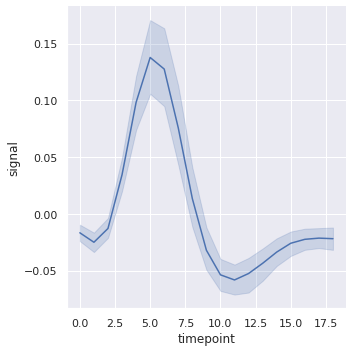

In [ ]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them:

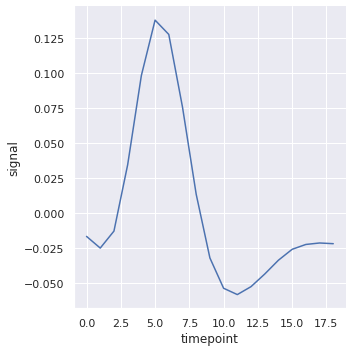

In [ ]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);


Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:

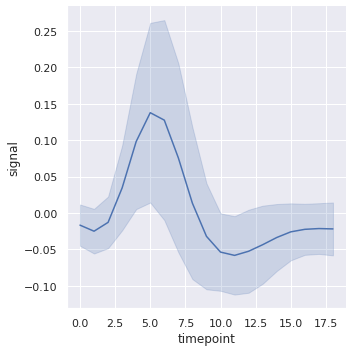

In [ ]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

To turn off aggregation altogether, set the estimator parameter to None This might produce a strange effect when the data have multiple observations at each point.

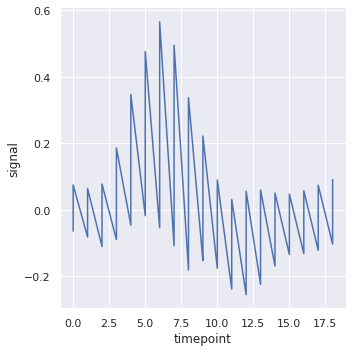

In [ ]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

**Plotting subsets of data with semantic mappings**

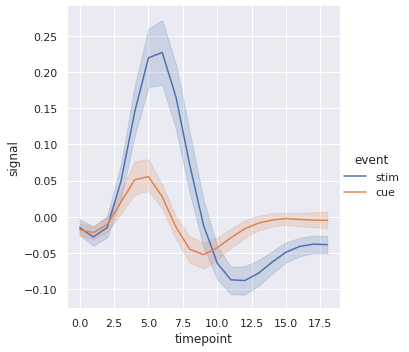

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

Adding a style semantic to a line plot changes the pattern of dashes in the line by default:

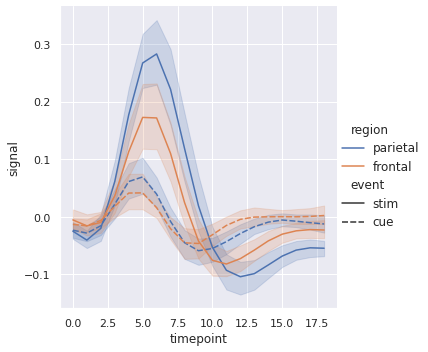

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

But you can identify subsets by the markers used at each observation, either together with the dashes or instead of them:



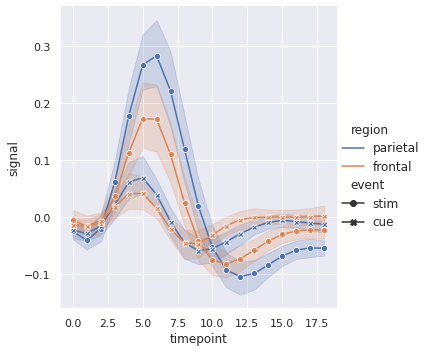

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

As with scatter plots, be cautious about making line plots using multiple semantics. While sometimes informative, they can also be difficult to parse and interpret. But even when you are only examining changes across one additional variable, it can be useful to alter both the color and style of the lines. This can make the plot more accessible when printed to black-and-white or viewed by someone with color blindness:

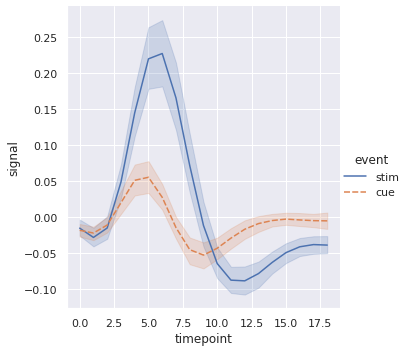

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            kind="line", data=fmri);

When you are working with repeated measures data (that is, you have units that were sampled multiple times), you can also plot each sampling unit separately without distinguishing them through semantics. This avoids cluttering the legend:

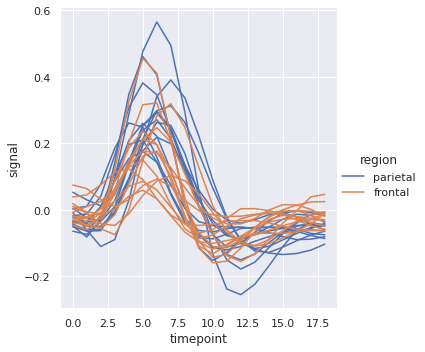

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));

The default colormap and handling of the legend in lineplot() also depends on whether the hue semantic is categorical or numeric:

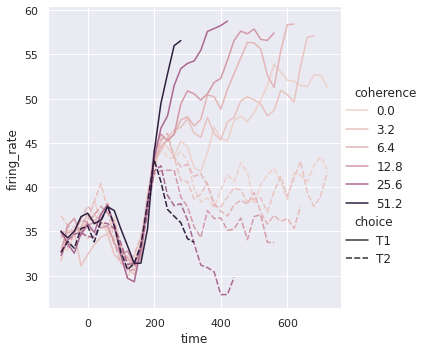

In [ ]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

It may happen that, even though the hue variable is numeric, it is poorly represented by a linear color scale. That’s the case here, where the levels of the hue variable are logarithmically scaled. You can provide specific color values for each line by passing a list or dictionary:

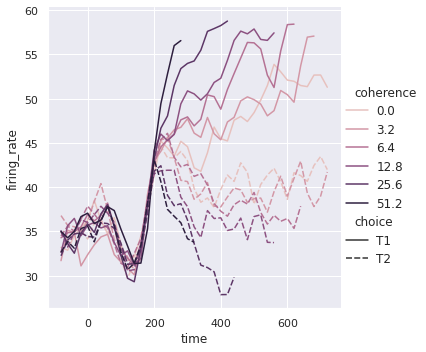

In [ ]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots);

Or you can alter how the colormap is normalized:

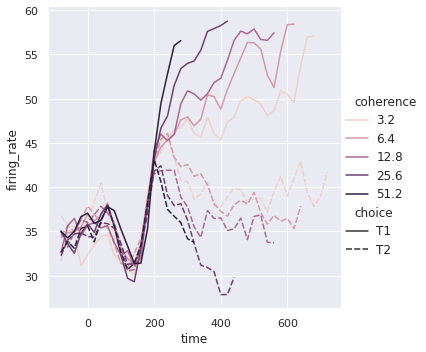

In [ ]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            hue_norm=LogNorm(),
            kind="line",
            data=dots.query("coherence > 0"));

The third semantic, size, changes the width of the lines:

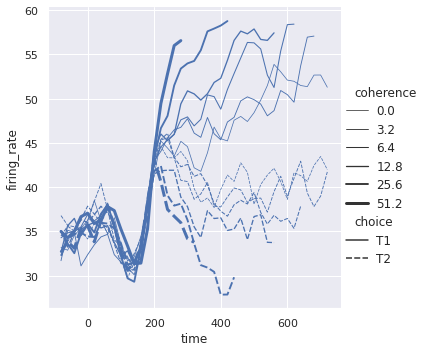

In [ ]:
sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", data=dots);

While the size variable will typically be numeric, it’s also possible to map a categorical variable with the width of the lines. Be cautious when doing so, because it will be difficult to distinguish much more than “thick” vs “thin” lines. However, dashes can be hard to perceive when lines have high-frequency variability, so using different widths may be more effective in that case:

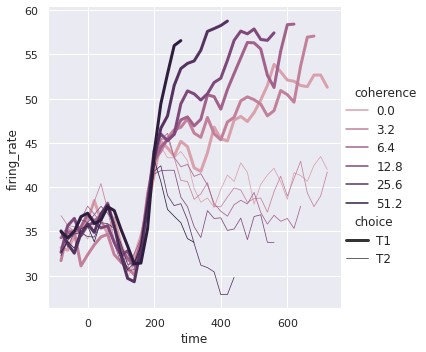

In [ ]:
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

**Plotting with date data**

Line plots are often used to visualize data associated with real dates and times. These functions pass the data down in their original format to the underlying matplotlib functions, and so they can take advantage of matplotlib’s ability to format dates in tick labels. But all of that formatting will have to take place at the matplotlib layer, and you should refer to the matplotlib documentation to see how it works:

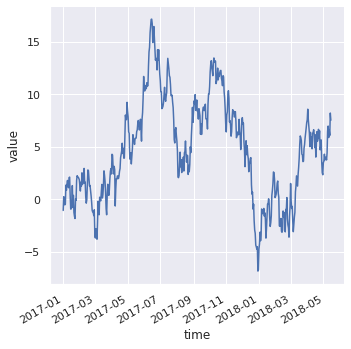

In [ ]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.figure.autofmt_xdate()

**Showing multiple relationships with facets**

We’ve emphasized in this tutorial that, while these functions can show several semantic variables at once, it’s not always effective to do so. But what about when you do want to understand how a relationship between two variables depends on more than one other variable?

The best approach may be to make more than one plot. Because relplot() is based on the FacetGrid, this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:



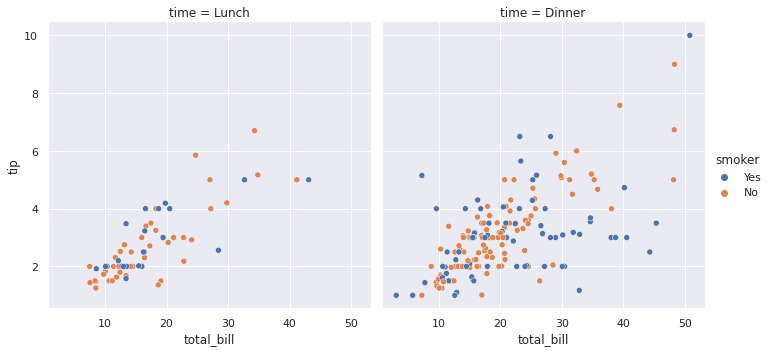

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size FacetGrid is parameterized by the height and aspect ratio of each facet:

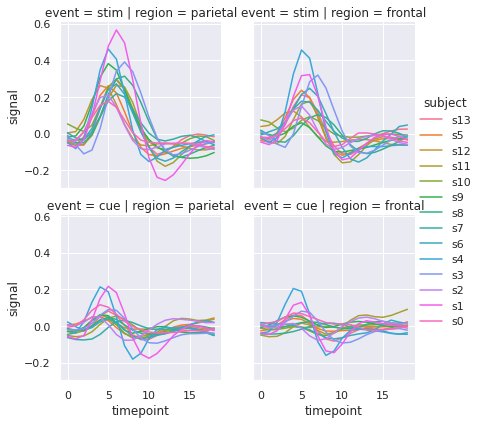

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows:

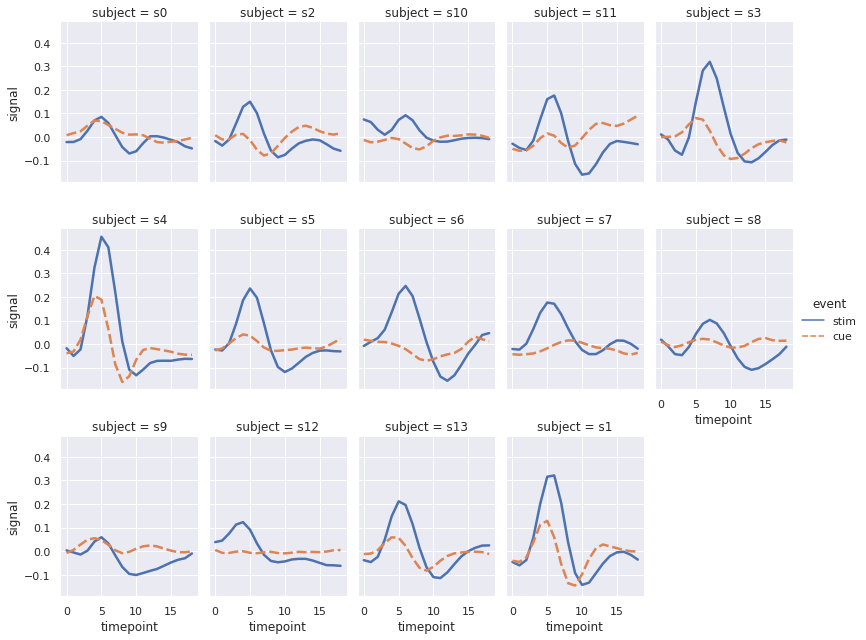

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));